In [4]:
%pip install seaborn

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

In [42]:
with zipfile.ZipFile('archive (4).zip', 'r') as zip_ref:
    zip_ref.extractall()

df = pd.read_csv('cardiovascular_risk_dataset.csv')

df.head(10)

,Patient_ID,age,bmi,systolic_bp,diastolic_bp,cholesterol_mg_dl,resting_heart_rate,smoking_status,daily_steps,stress_level,physical_activity_hours_per_week,sleep_hours,family_history_heart_disease,diet_quality_score,alcohol_units_per_week,heart_disease_risk_score,risk_category
0,1,62,25.0,142,93,247,72,Never,11565,3,5.6,8.2,No,7,0.7,28.1,Medium
1,2,54,29.7,158,101,254,74,Current,4036,8,0.5,6.7,No,5,4.5,63.0,High
2,3,46,36.2,170,113,276,80,Current,3043,9,0.4,4.0,No,1,20.8,73.1,High
3,4,48,30.4,153,98,230,73,Former,5604,5,0.6,8.0,No,4,8.5,39.5,Medium
4,5,46,25.3,139,87,206,69,Current,7464,1,2.0,6.1,No,5,3.6,29.3,Medium
5,6,28,20.2,124,78,203,84,Never,5036,5,0.0,5.2,No,8,2.9,0.0,Low
6,7,20,29.0,139,86,208,78,Never,2172,4,2.7,8.2,No,5,9.9,8.7,Low
7,8,44,24.7,146,104,220,74,Former,4840,8,1.8,7.6,No,6,2.6,30.9,Medium
8,9,48,26.1,136,87,221,75,Former,1366,8,0.0,6.0,No,6,3.0,31.3,Medium
9,10,89,32.7,162,107,286,74,Never,2443,2,1.9,7.1,No,5,4.4,58.8,High


In [43]:
df.dtypes

Patient_ID                            int64
age                                   int64
bmi                                 float64
systolic_bp                           int64
diastolic_bp                          int64
cholesterol_mg_dl                     int64
resting_heart_rate                    int64
smoking_status                       object
daily_steps                           int64
stress_level                          int64
physical_activity_hours_per_week    float64
sleep_hours                         float64
family_history_heart_disease         object
diet_quality_score                    int64
alcohol_units_per_week              float64
heart_disease_risk_score            float64
risk_category                        object
dtype: object

In [58]:

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['cholesterol'] = pd.to_numeric(df['cholesterol_mg_dl'], errors='coerce')
df['blood_pressure'] = pd.to_numeric(df['systolic_bp'], errors='coerce')

df.dtypes

Patient_ID                            int64
age                                   int64
bmi                                 float64
systolic_bp                           int64
diastolic_bp                          int64
cholesterol_mg_dl                     int64
resting_heart_rate                    int64
smoking_status                       object
daily_steps                           int64
stress_level                          int64
physical_activity_hours_per_week    float64
sleep_hours                         float64
family_history_heart_disease         object
diet_quality_score                    int64
alcohol_units_per_week              float64
heart_disease_risk_score            float64
risk_category                        object
cholesterol                           int64
blood_pressure                        int64
dtype: object

In [59]:
df.isna().sum()

Patient_ID                          0
age                                 0
bmi                                 0
systolic_bp                         0
diastolic_bp                        0
cholesterol_mg_dl                   0
resting_heart_rate                  0
smoking_status                      0
daily_steps                         0
stress_level                        0
physical_activity_hours_per_week    0
sleep_hours                         0
family_history_heart_disease        0
diet_quality_score                  0
alcohol_units_per_week              0
heart_disease_risk_score            0
risk_category                       0
cholesterol                         0
blood_pressure                      0
dtype: int64

In [60]:
df_missing = df.copy()
df_missing.loc[0:5, 'cholesterol'] = np.nan

df_missing.isna().sum()

Patient_ID                          0
age                                 0
bmi                                 0
systolic_bp                         0
diastolic_bp                        0
cholesterol_mg_dl                   0
resting_heart_rate                  0
smoking_status                      0
daily_steps                         0
stress_level                        0
physical_activity_hours_per_week    0
sleep_hours                         0
family_history_heart_disease        0
diet_quality_score                  0
alcohol_units_per_week              0
heart_disease_risk_score            0
risk_category                       0
cholesterol                         6
blood_pressure                      0
dtype: int64

In [61]:
df_removed = df_missing.dropna()

print("Original shape:", df.shape)
print("After removing missing values:", df_removed.shape)

Original shape: (5500, 19)
After removing missing values: (5494, 19)


In [62]:
df_imputed_mean = df_missing.copy()

df_imputed_mean['cholesterol'] = df_imputed_mean['cholesterol'].fillna(
    df_imputed_mean['cholesterol'].mean()
)

df_imputed_mean.isna().sum()

Patient_ID                          0
age                                 0
bmi                                 0
systolic_bp                         0
diastolic_bp                        0
cholesterol_mg_dl                   0
resting_heart_rate                  0
smoking_status                      0
daily_steps                         0
stress_level                        0
physical_activity_hours_per_week    0
sleep_hours                         0
family_history_heart_disease        0
diet_quality_score                  0
alcohol_units_per_week              0
heart_disease_risk_score            0
risk_category                       0
cholesterol                         0
blood_pressure                      0
dtype: int64

In [63]:
df_imputed_median = df_missing.copy()

df_imputed_median['cholesterol'] = df_imputed_median['cholesterol'].fillna(
    df_imputed_median['cholesterol'].mean()
)

df_imputed_median.isna().sum()

Patient_ID                          0
age                                 0
bmi                                 0
systolic_bp                         0
diastolic_bp                        0
cholesterol_mg_dl                   0
resting_heart_rate                  0
smoking_status                      0
daily_steps                         0
stress_level                        0
physical_activity_hours_per_week    0
sleep_hours                         0
family_history_heart_disease        0
diet_quality_score                  0
alcohol_units_per_week              0
heart_disease_risk_score            0
risk_category                       0
cholesterol                         0
blood_pressure                      0
dtype: int64

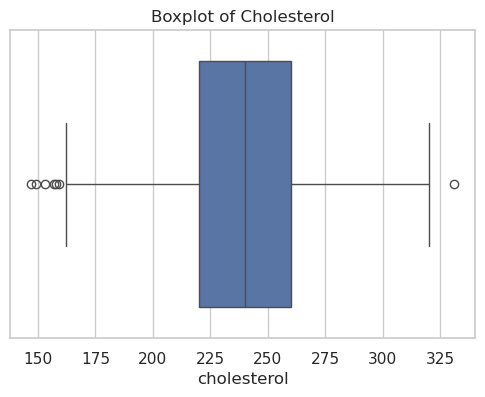

In [64]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['cholesterol'])
plt.title("Boxplot of Cholesterol")
plt.show()

In [65]:
Q1 = df['cholesterol'].quantile(0.25)
Q3 = df['cholesterol'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower, upper

(np.float64(160.0), np.float64(320.0))

In [66]:
df_no_outliers = df[
    (df['cholesterol'] >= lower) &
    (df['cholesterol'] <= upper)
]

print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)

Original shape: (5500, 19)
After removing outliers: (5493, 19)


In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = df[['age', 'cholesterol']].copy()
df_scaled[['age', 'cholesterol']] = scaler.fit_transform(df_scaled)

df_scaled.head()

,age,cholesterol
0,0.611111,0.543478
1,0.500000,0.581522
2,0.388889,0.701087
3,0.416667,0.451087
4,0.388889,0.320652


In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_standardized = df[['age', 'cholesterol']].copy()
df_standardized[['age', 'cholesterol']] = scaler.fit_transform(df_standardized)

df_standardized.head()

,age,cholesterol
0,0.383503,0.256088
1,0.006039,0.501121
2,-0.371424,1.271225
3,-0.277058,-0.338992
4,-0.371424,-1.179105


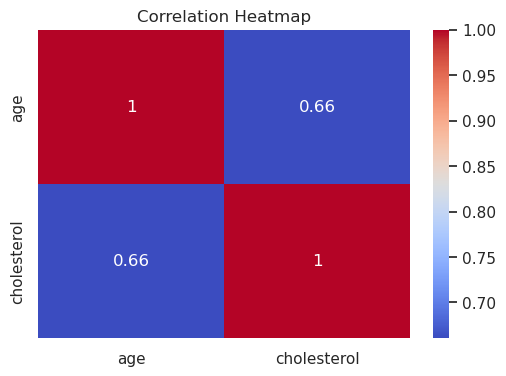

In [69]:
plt.figure(figsize=(6,4))
sns.heatmap(df_standardized[['age','cholesterol']].corr(),
            annot=True,
            cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [70]:
from sklearn.decomposition import PCA

X = df_standardized[['age', 'cholesterol']]

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

principal_components[:5]

array([[ 0.45225933, -0.09009602],
       [ 0.35861667,  0.35007564],
       [ 0.63625508,  1.16152837],
       [-0.43561342, -0.04379371],
       [-1.09638992, -0.57111663]])

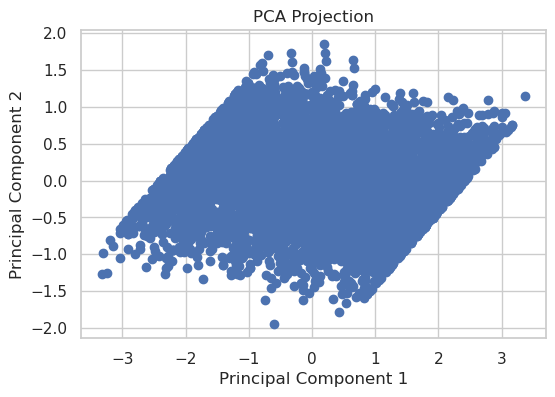

In [71]:
plt.figure(figsize=(6,4))
plt.scatter(principal_components[:,0],
            principal_components[:,1])
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()